In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Collect Data

collect data train and test from : https://www.kaggle.com/competitions/playground-series-s3e24/overview

In [17]:
data_train = pd.read_csv('playground-series-s3e24/train.csv')
data_test = pd.read_csv('playground-series-s3e24/test.csv')

In [18]:
data_train

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


In [4]:
data_test

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,186,44,100,16.0,2,1.0,25,31,38,0
106168,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,76,53,142,15.9,1,0.8,33,32,24,1
106169,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,81,55,103,13.9,1,0.6,42,36,32,0


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [6]:
# check for missing values
data_train.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

There's 24 columns with 23 column as feature and 1 column as target (smoking) <br>
None of the feature is null value

In [7]:
# show all columns
# pd.set_option('display.max_columns', None)
data_train.describe(include='all')

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


As we see, some of data have few unique value, so we can assume that the data is categorical data

In [8]:
print(f'hearing(left) : \n{data_train["hearing(left)"].value_counts()}')
print(f'\nhearing(right) : \n{data_train["hearing(right)"].value_counts()}')
print(f'\nUrine protein : \n{data_train["Urine protein"].value_counts()}')
print(f'\ndental caries : \n{data_train["dental caries"].value_counts()}')
print(f'\nsmoking : \n{data_train["smoking"].value_counts()}')


hearing(left) : 
1    155438
2      3818
Name: hearing(left), dtype: int64

hearing(right) : 
1    155526
2      3730
Name: hearing(right), dtype: int64

Urine protein : 
1    150862
2      5609
3      2228
4       477
5        74
6         6
Name: Urine protein, dtype: int64

dental caries : 
0    127724
1     31532
Name: dental caries, dtype: int64

smoking : 
0    89603
1    69653
Name: smoking, dtype: int64


From the result above, there's data with categorical <br>
The columns with categorical data such as: <br>
- hearing(left)<br>
- hearing(right)<br>
- Urine Protein<br>
- dental caries<br>
- smoking<br>

In [16]:
# # Change data into categorical data
# data_train['hearing(left)'] = data_train['hearing(left)'].astype('category')
# data_train['hearing(right)'] = data_train['hearing(right)'].astype('category')
# data_train['Urine protein'] = data_train['Urine protein'].astype('category')
# data_train['dental caries'] = data_train['dental caries'].astype('category')
# data_train['smoking'] = data_train['smoking'].astype('category')
# data_train.info()

# Visualize Data

0    89603
1    69653
Name: smoking, dtype: int64


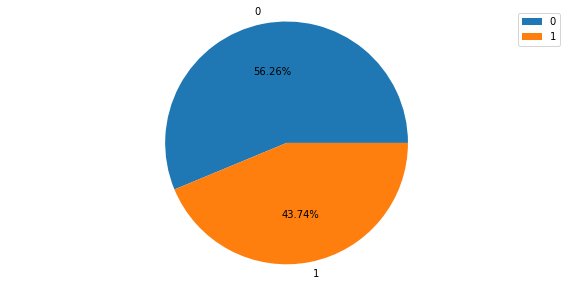

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
print(data_train['smoking'].value_counts())
fig, ax=plt.subplots(1,1,figsize=(10,5))
# using pie chart to show the distribution of smoking
def plot_pie(column):
    # for plotting
    ax.pie(column.value_counts(),autopct='%1.2f%%',labels=column.value_counts().index)
    ax.legend(column.value_counts().index)
    ax.axis('equal')

plot_pie(data_train['smoking'])

as we can see here, the distribution of the data is still acceptable. <br>
the difference between the target is 19,950 or equal 12.6% of whole data.

## Let's see the data separately by the Visible Characteristics

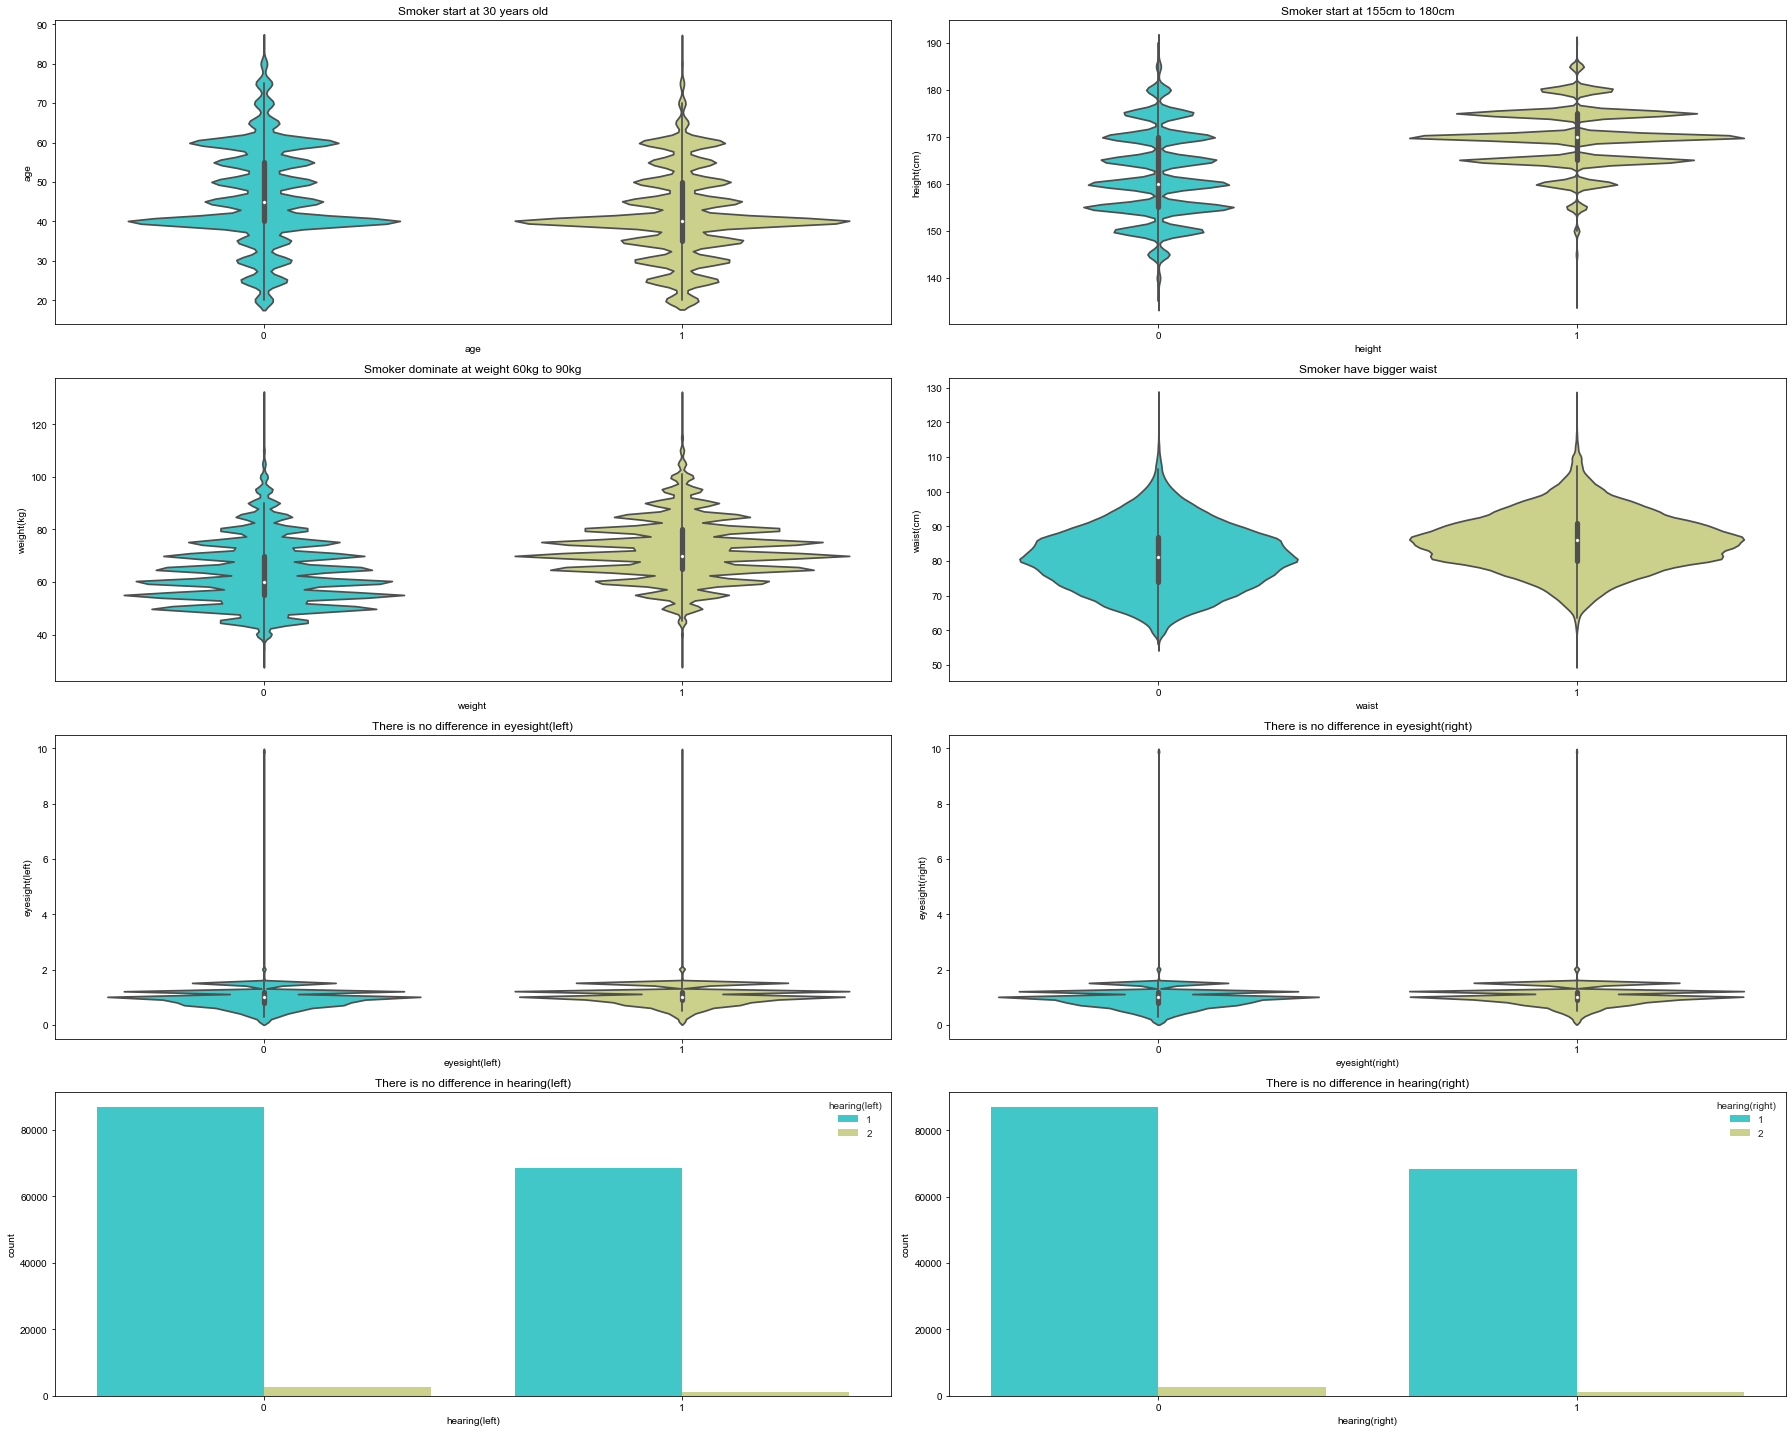

In [11]:
# check the distribution of the target variable
fig, ax=plt.subplots(4,2,figsize=(25,20))
plt.style.use("seaborn")

sns.violinplot(data=data_train,x='smoking',y='age',ax=ax[0,0],
               palette='rainbow')
ax[0,0].set_xlabel("age",fontsize=10)
ax[0,0].title.set_text("Smoker start at 30 years old")

sns.violinplot(x='smoking',y='height(cm)',data=data_train,ax=ax[0,1],
               palette='rainbow')
ax[0,1].set_xlabel("height",fontsize=10)
ax[0,1].title.set_text("Smoker start at 155cm to 180cm")

sns.violinplot(x='smoking',y='weight(kg)',data=data_train,ax=ax[1,0],
                palette='rainbow')
ax[1,0].set_xlabel("weight",fontsize=10)
ax[1,0].title.set_text("Smoker dominate at weight 60kg to 90kg")

sns.violinplot(x='smoking',y='waist(cm)',data=data_train,ax=ax[1,1],
                palette='rainbow')
ax[1,1].set_xlabel("waist",fontsize=10)
ax[1,1].title.set_text("Smoker have bigger waist")

sns.violinplot(x='smoking',y='eyesight(left)',data=data_train,ax=ax[2,0],
                palette='rainbow')
ax[2,0].set_xlabel("eyesight(left)",fontsize=10)
ax[2,0].title.set_text("There is no difference in eyesight(left)")

sns.violinplot(x='smoking',y='eyesight(right)',data=data_train,ax=ax[2,1],
                palette='rainbow')
ax[2,1].set_xlabel("eyesight(right)",fontsize=10)
ax[2,1].title.set_text("There is no difference in eyesight(right)")

sns.countplot(x='smoking',hue='hearing(left)',data=data_train,ax=ax[3,0],
                palette='rainbow')
ax[3,0].set_xlabel("hearing(left)",fontsize=10)
ax[3,0].title.set_text("There is no difference in hearing(left)")

sns.countplot(x='smoking',hue='hearing(right)',data=data_train,ax=ax[3,1],
                palette='rainbow')
ax[3,1].set_xlabel("hearing(right)",fontsize=10)
ax[3,1].title.set_text("There is no difference in hearing(right)")

plt.tight_layout()
plt.show()


Age, Height, weight, waist kindly have different between non-smoker and smoker. <br>Meanwhile Eyesight and hearing looks similar between non-smoker and smoker. <br>

## Let's see the data separately by the Internal or Diagnostic Metrics

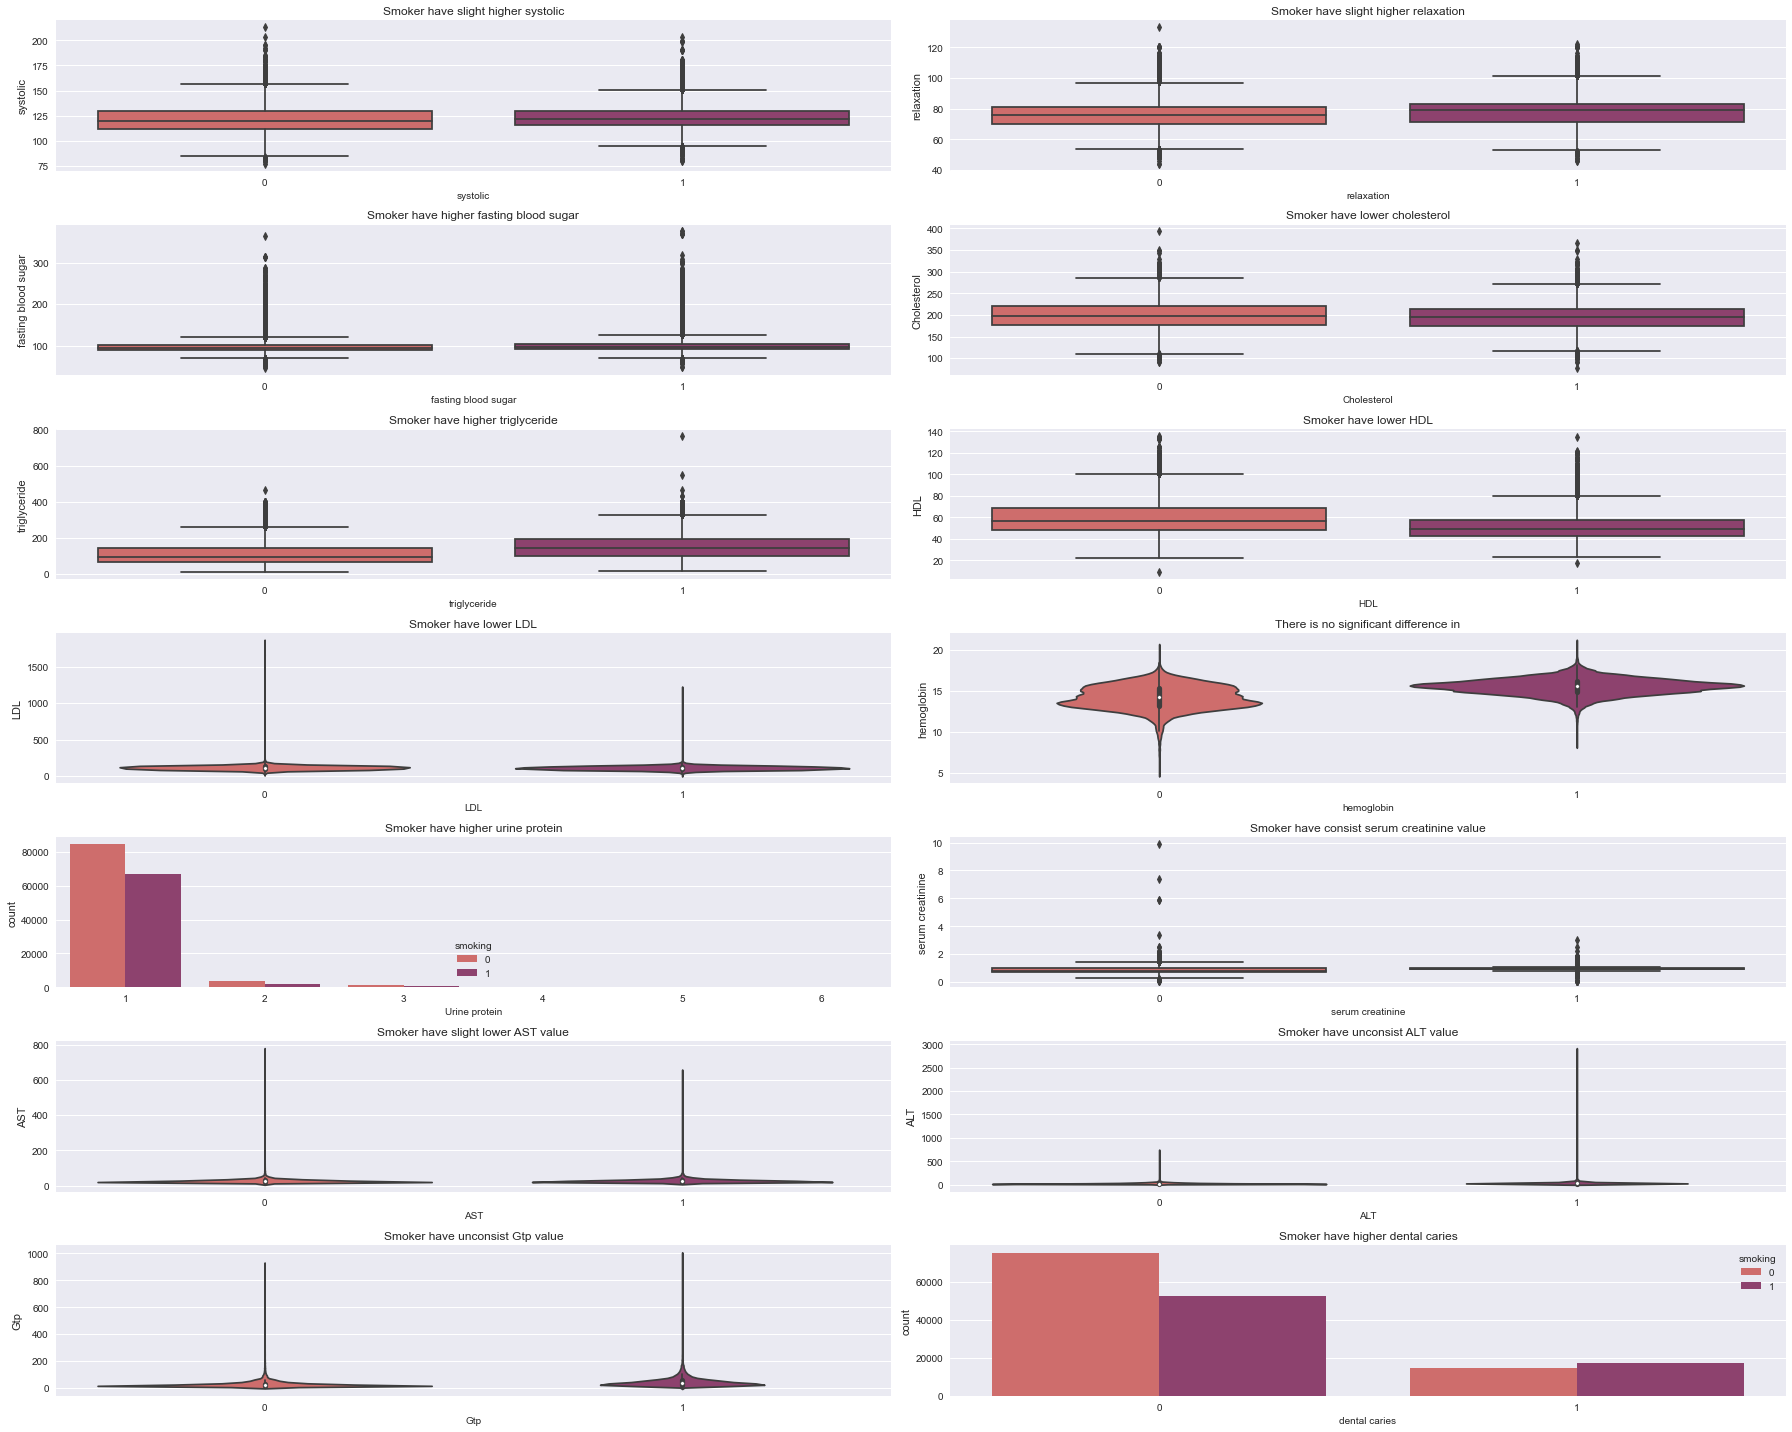

In [12]:
# check the distribution of the target variable
fig, ax=plt.subplots(7,2,figsize=(25,20))
plt.style.use("seaborn")

sns.boxplot(x='smoking',y='systolic',data=data_train,ax=ax[0,0],
               palette='flare')
ax[0,0].set_xlabel("systolic",fontsize=10)
ax[0,0].title.set_text("Smoker have slight higher systolic")

sns.boxplot(x='smoking',y='relaxation',data=data_train,ax=ax[0,1],
               palette='flare')
ax[0,1].set_xlabel("relaxation",fontsize=10)
ax[0,1].title.set_text("Smoker have slight higher relaxation")

# fasting blood sugar
sns.boxplot(x='smoking',y='fasting blood sugar',data=data_train,ax=ax[1,0],
                palette='flare')
ax[1,0].set_xlabel("fasting blood sugar",fontsize=10)
ax[1,0].title.set_text("Smoker have higher fasting blood sugar")

# Cholesterol
sns.boxplot(x='smoking',y='Cholesterol',data=data_train,ax=ax[1,1],
                palette='flare')
ax[1,1].set_xlabel("Cholesterol",fontsize=10)
ax[1,1].title.set_text("Smoker have lower cholesterol")

# triglyceride           
sns.boxplot(x='smoking',y='triglyceride',data=data_train,ax=ax[2,0],
                palette='flare')
ax[2,0].set_xlabel("triglyceride",fontsize=10)
ax[2,0].title.set_text("Smoker have higher triglyceride")

# HDL                    
sns.boxplot(x='smoking',y='HDL',data=data_train,ax=ax[2,1],
                palette='flare')
ax[2,1].set_xlabel("HDL",fontsize=10)
ax[2,1].title.set_text("Smoker have lower HDL")

# LDL
sns.violinplot(x='smoking',y='LDL',data=data_train,ax=ax[3,0],
                palette='flare')
ax[3,0].set_xlabel("LDL",fontsize=10)
ax[3,0].title.set_text("Smoker have lower LDL")

# hemoglobin

sns.violinplot(x='smoking',y='hemoglobin',data=data_train,ax=ax[3,1],
                palette='flare')
ax[3,1].set_xlabel("hemoglobin",fontsize=10)
ax[3,1].title.set_text("There is no significant difference in")

# Urine protein
sns.countplot(x='Urine protein',hue='smoking',data=data_train,ax=ax[4,0],
                palette='flare')
ax[4,0].set_xlabel("Urine protein",fontsize=10)
ax[4,0].title.set_text("Smoker have higher urine protein")

# serum creatinine
sns.boxplot(x='smoking',y='serum creatinine',data=data_train,ax=ax[4,1],
                palette='flare')
ax[4,1].set_xlabel("serum creatinine",fontsize=10)
ax[4,1].title.set_text("Smoker have consist serum creatinine value")

# AST
sns.violinplot(x='smoking',y='AST',data=data_train,ax=ax[5,0],
                palette='flare')
ax[5,0].set_xlabel("AST",fontsize=10)
ax[5,0].title.set_text("Smoker have slight lower AST value")

# ALT
sns.violinplot(x='smoking',y='ALT',data=data_train,ax=ax[5,1],
                palette='flare')
ax[5,1].set_xlabel("ALT",fontsize=10)
ax[5,1].title.set_text("Smoker have unconsist ALT value")

# Gtp
sns.violinplot(x='smoking',y='Gtp',data=data_train,ax=ax[6,0],
                palette='flare')
ax[6,0].set_xlabel("Gtp",fontsize=10)
ax[6,0].title.set_text("Smoker have unconsist Gtp value")

# dental caries
sns.countplot(x='dental caries',hue='smoking',data=data_train,ax=ax[6,1],
                palette='flare')
ax[6,1].set_xlabel("dental caries",fontsize=10)
ax[6,1].title.set_text("Smoker have higher dental caries")


plt.tight_layout()
plt.show()


At Internal or Diagnostic Metrics, we can see the value of each others is similar between non-smoker and smoker. <br> Meanwhile some of data show different value between non-smoker and smoker. <br>
Relaxation, HDL, Hemogloblin, LDL, Urine Protein,  serum creatinine, AST, ALT, GTP, dental caries.<br> However, the different value is not too far away.

## Check correlation between the data

d:\Python38\lib\site-packages\scipy\stats\_stats_py.py:4868: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


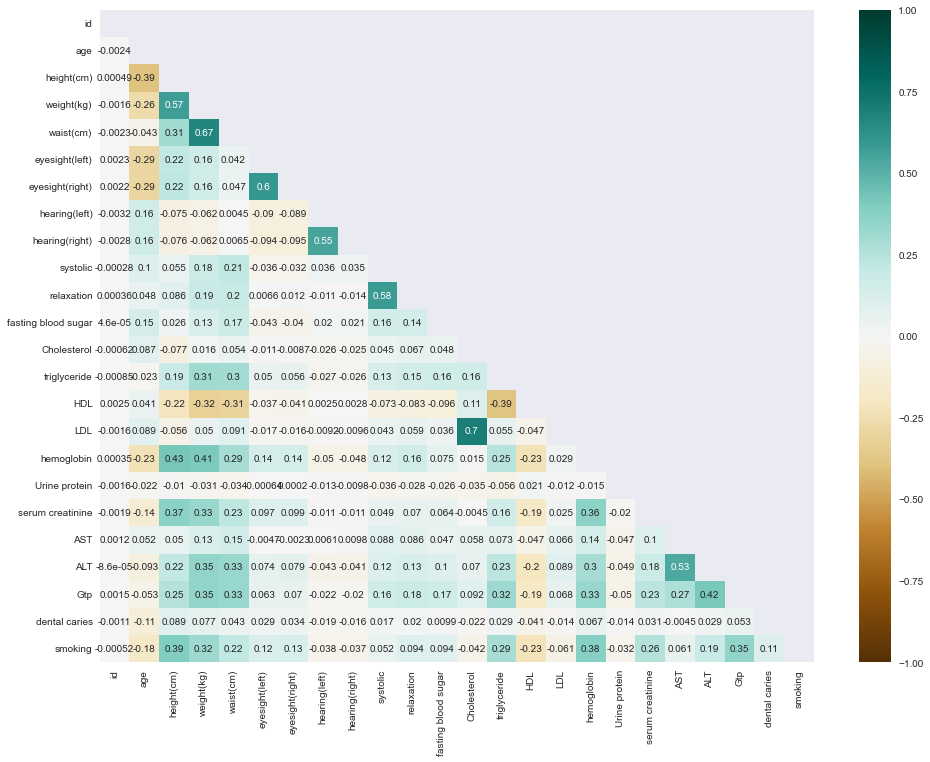

In [19]:
# Why use Kendall : https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
corr = data_train.corr('kendall')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [20]:
data_train.corr('kendall')['smoking'].sort_values(ascending=False)[1:]

d:\Python38\lib\site-packages\scipy\stats\_stats_py.py:4868: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


height(cm)             0.392405
hemoglobin             0.377369
Gtp                    0.348271
weight(kg)             0.315008
triglyceride           0.285617
serum creatinine       0.255352
waist(cm)              0.216883
ALT                    0.187793
eyesight(right)        0.128175
eyesight(left)         0.119138
dental caries          0.106636
relaxation             0.094483
fasting blood sugar    0.093641
AST                    0.060629
systolic               0.052012
id                    -0.000516
Urine protein         -0.031989
hearing(right)        -0.036858
hearing(left)         -0.038219
Cholesterol           -0.042206
LDL                   -0.060890
age                   -0.180773
HDL                   -0.225118
Name: smoking, dtype: float64

As we can see here, HDL and Age have -0.1 correlation with smoking. <br>
We still don't know the correlation between the data with the target, so we can't drop the data yet.

# Preprocessing

In [24]:
# Set Y sebagai target featured, X sebagai indikasi 
y = data_train['smoking']
X = data_train.drop(['smoking'], axis=1)
X.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,300,40,75,16.5,1,1.0,22,25,27,0
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,55,57,126,16.2,1,1.1,27,23,37,1
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,197,45,93,17.4,1,0.8,27,31,53,0
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,203,38,102,15.9,1,1.0,20,27,30,1
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,87,44,93,15.4,1,0.8,19,13,17,0


In [25]:
# Buat dataset untuk latihan dan testing, pake fungsi train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)
print(len(X_train))
print(len(X_test))

127404
31852


In [28]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Define the columns to be excluded from scaling
columns_to_exclude = ['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on X_train, excluding the specified columns
scaler = scaler.fit(X_train.drop(columns=columns_to_exclude))

# Transform X_train and X_test, excluding the specified columns
X_train[X_train.columns.difference(columns_to_exclude)] = scaler.transform(X_train.drop(columns=columns_to_exclude))
X_test[X_test.columns.difference(columns_to_exclude)] = scaler.transform(X_test.drop(columns=columns_to_exclude))

# Apply Label Encoding to the categorical columns
label_encoder = LabelEncoder()

for column in columns_to_exclude:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

# Describe the scaled and label-encoded X_train
X_train.describe()


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,1.274040e+05,1.274040e+05,1.274040e+05,1.274040e+05,1.274040e+05,1.274040e+05,1.274040e+05,127404.000000,127404.000000,1.274040e+05,...,1.274040e+05,1.274040e+05,1.274040e+05,1.274040e+05,127404.000000,1.274040e+05,1.274040e+05,1.274040e+05,1.274040e+05,127404.000000
mean,1.288306e-17,-2.565458e-18,-1.606200e-17,-2.986528e-17,-2.780176e-17,1.505813e-18,-2.710463e-17,0.023908,0.023484,1.182342e-17,...,-1.015029e-17,3.067396e-18,2.386992e-17,-1.639663e-17,0.074558,-3.903958e-19,-2.487379e-17,2.571035e-17,-2.046790e-17,0.197286
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.152764,0.151437,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.348786,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.397951
min,-3.574233e+00,-3.650836e+00,-3.426737e+00,-2.951310e+00,-1.729973e+00,-4.399214e+00,-3.961700e+00,0.000000,0.000000,-6.910104e+00,...,-2.055464e+00,-1.399641e+00,-3.571490e+00,-2.052258e+00,0.000000,-1.761975e+00,-2.305410e+00,-3.355226e+00,-1.099947e+00,0.000000
25%,-6.679275e-01,-7.629385e-01,-5.937586e-01,-5.650102e-01,-8.651217e-01,-5.131470e-01,-6.845763e-01,0.000000,0.000000,-6.944648e-01,...,-3.659827e-01,-5.772719e-01,-6.668657e-01,-5.797695e-01,0.000000,-7.647355e-01,-5.127512e-01,-7.783867e-01,-5.849563e-01,0.000000
50%,2.758377e-03,1.256454e-01,-2.716283e-02,-1.672936e-01,-2.467556e-03,4.200551e-02,-2.217892e-02,0.000000,0.000000,1.435989e-01,...,-3.659827e-01,-2.483241e-01,-1.173422e-01,-1.590586e-01,0.000000,-1.905673e-01,-5.628266e-04,-1.341769e-01,-2.952741e-01,0.000000
75%,6.734443e-01,5.699373e-01,5.394329e-01,6.281396e-01,8.642116e-01,5.971580e-01,6.402184e-01,0.000000,0.000000,7.023080e-01,...,9.011284e-01,2.999222e-01,5.891880e-01,3.668301e-01,0.000000,5.649172e-01,5.116255e-01,5.816117e-01,2.519034e-01,0.000000
max,4.921122e+00,6.234659e+00,2.805816e+00,5.003022e+00,1.734894e+00,5.000573e+01,6.084865e+01,1.000000,1.000000,4.333917e+00,...,3.435351e+00,1.583045e+02,7.104967e+00,7.914495e+01,5.000000,5.112934e+00,2.279182e+01,5.735290e+00,2.574394e+01,1.000000


In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [33]:
# Melihat dimensi data sebelum membuat machine learning
print('Data shapes:\n')
print('X_train : {}\ny_train : {}\n\nX_test : {}\ny_test : {}'.format(np.shape(X_train),
                                                                      np.shape(y_train),
                                                                      np.shape(X_test),
                                                                      np.shape(y_test)))

Data shapes:

X_train : (127404, 23)
y_train : (127404,)

X_test : (31852, 23)
y_test : (31852,)


# Build ML

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [36]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None,classifiers = 'all')
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [1:00:32<00:00, 125.25s/it]


In [37]:
print(models)


                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.78               0.79     0.79      0.79   
XGBClassifier                      0.78               0.78     0.78      0.78   
NuSVC                              0.77               0.78     0.78      0.78   
SVC                                0.77               0.78     0.78      0.77   
RandomForestClassifier             0.78               0.78     0.78      0.78   
ExtraTreesClassifier               0.77               0.77     0.77      0.77   
AdaBoostClassifier                 0.77               0.77     0.77      0.77   
SGDClassifier                      0.75               0.76     0.76      0.75   
LinearSVC                          0.75               0.75     0.75      0.75   
LinearDiscriminantAnalysis         0.75               0.75     0.75      0.75   
RidgeClassifierCV           